In [1]:
import main
import cirq
import math
from cirq.contrib.svg import SVGCircuit
import sympy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
N=4 #Number of stocks

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [09:21<00:00, 35.07s/it]


Text(0.5, 0, 'γ')

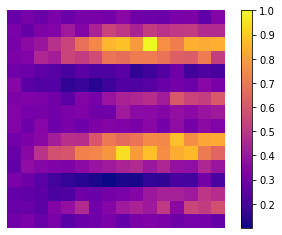

In [11]:
numpoints=16; # Number of values for beta and gamma
numsim=100;    # Number of shots per each value (increase for higher accuracy)
simulator = cirq.Simulator()
Cost=np.zeros([numpoints,numpoints])
betas= np.linspace(0, 2 * np.pi, numpoints)
gammas= np.linspace(0, 2 * np.pi, numpoints)

for jj in tqdm(range(numpoints)):
    for kk in range(numpoints):
        circuit=main.circuit_builder(betas[jj],gammas[kk])
        for i in range(numsim):
            result = simulator.run(circuit)
            list=[]
            z=[]
            for value in result.measurements.values():
                list.append(value[0,0])
            for i in range(N):
                z.append((list[2*i]-list[2*i+1]))
            Cost[jj,kk]+=main.cost_function(z)
plt.imshow(Cost/np.amax(Cost),"plasma")
plt.axis("off")
plt.colorbar()
plt.xlabel("γ")